In [1]:
import numpy as np
from matplotlib import pyplot as plt
plt.style.use('seaborn')

/tmp/ipykernel_513/1705154410.py:3: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


In [2]:
def set_size(width = "thesis", fraction=1, subplots=(1, 1)):
    if width == 'thesis':
        width_pt = 426.79135
    elif width == 'beamer':
        width_pt = 307.28987
    else:
        width_pt = width

    # Width of figure (in pts)
    fig_width_pt = width_pt * fraction

    # Convert from pt to inches
    inches_per_pt = 1 / 72.27

    # Golden ratio to set aesthetic figure height
    golden_ratio = (5**0.5 - 1) / 2

    # Figure width in inches
    fig_width_in = fig_width_pt * inches_per_pt
    # Figure height in inches
    fig_height_in = fig_height_in = fig_width_in * golden_ratio * (subplots[0] / subplots[1])

    fig_dim = (fig_width_in, fig_height_in)

    return fig_dim

In [3]:
voltage_configs = np.loadtxt("../../data/cont_comparison/voltage_configs.csv")


# kmc data
# kmc_means = np.zeros((200,16))
# kmc_vars = np.zeros((200,16))
# for i in range(200):
#     try:
#         states = np.loadtxt("../../data/cont_comparison/kmc/"+str(i)+"_.csv")
#         mean = np.mean(states, axis = 0)
#         mean_2 = np.mean(states ** 2, axis = 0)
#         var = mean_2 - mean ** 2

#         kmc_means[i] = mean
#         kmc_vars[i] = var
#     except: pass

kmc_means = np.loadtxt("../../data/cont_comparison/kmc/kmc_means.csv")
kmc_vars = np.loadtxt("../../data/cont_comparison/kmc/kmc_vars.csv")

valid_cond = np.logical_and(kmc_means != 0, kmc_vars != 0)
valid = np.where(valid_cond)
valid = np.unique(valid[0])

In [4]:
## mf2 data
mf2_means = np.loadtxt("../../data/cont_comparison/mf2/entropy_mf2_means.csv")
mf2_vars = np.loadtxt("../../data/cont_comparison/mf2/entropy_mf2_vars.csv")

mf2_dmeans = np.loadtxt("../../data/cont_comparison/mf2/entropy_mf2_dmeans.csv")
mf2_dvars = np.loadtxt("../../data/cont_comparison/mf2/entropy_mf2_dvars.csv")

## mf1 data
mf_means = np.loadtxt("../../data/cont_comparison/mf/mf_means.csv")

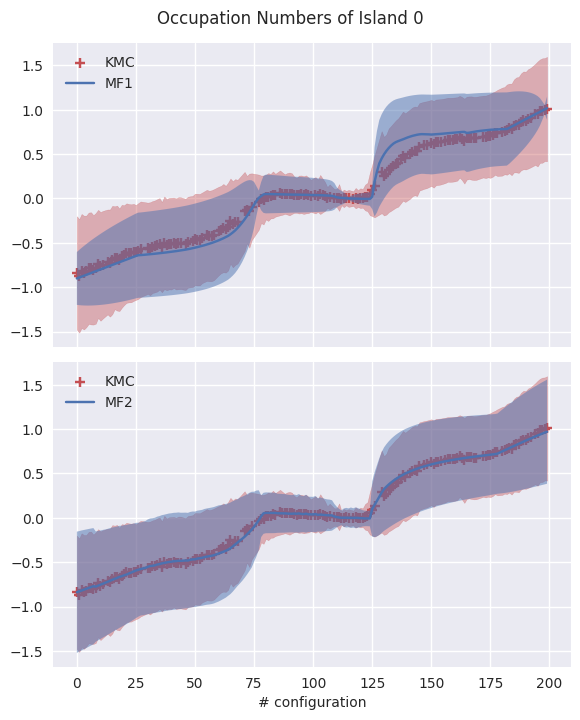

In [5]:
#0,3,12,15

f, axs = plt.subplots(2, 1, figsize= set_size(subplots=(2, 1)), sharex=True, sharey=True)

i = 0
# KMC and MF1
d = mf_means[:,i] - np.floor(mf_means[:,i])
var = d * (1 - d)

axs[0].scatter(np.arange(200)[valid], kmc_means[:,i][valid], label = "KMC", color = "C2", marker = "+")
axs[0].fill_between(np.arange(200)[valid], kmc_means[:,i][valid] - np.sqrt(kmc_vars[:,i][valid]), kmc_means[:,i][valid] + np.sqrt(kmc_vars[:,i][valid]), alpha = 0.4, color = "C2")


axs[0].plot(np.arange(200), mf_means[:,i], label = "MF1")
axs[0].fill_between(np.arange(200), mf_means[:,i] - np.sqrt(var), mf_means[:,i] + np.sqrt(var), alpha = 0.5)
axs[0].legend(loc = "upper left")
#axs[0].set_ylim(-1.5,0.5)


# KMC and MF2

axs[1].scatter(np.arange(200)[valid], kmc_means[:,i][valid], label = "KMC", color = "C2", marker = "+")
axs[1].fill_between(np.arange(200)[valid], kmc_means[:,i][valid] - np.sqrt(kmc_vars[:,i][valid]), kmc_means[:,i][valid] + np.sqrt(kmc_vars[:,i][valid]), alpha = 0.4, color = "C2")


axs[1].plot(np.arange(200), mf2_means[:,i], label = "MF2")
axs[1].fill_between(np.arange(200), mf2_means[:,i] - np.sqrt(mf2_vars[:,i]), mf2_means[:,i] + np.sqrt(mf2_vars[:,i]), alpha = 0.5)
axs[1].legend(loc = "upper left")
axs[1].set_xlabel("# configuration")


f.suptitle("Occupation Numbers of Island " + str(i))
f.tight_layout()
plt.savefig("../../output/cont_comparison/states_island"+str(i)+".pdf")


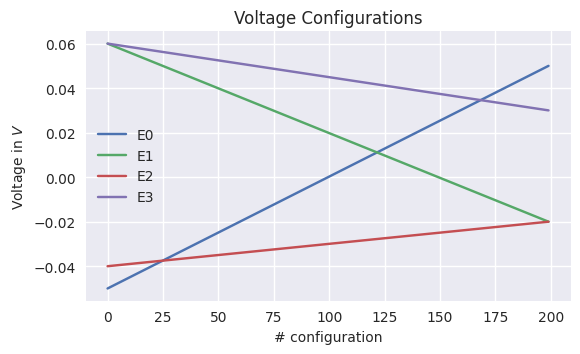

In [6]:
plt.figure(figsize=set_size())
plt.plot(voltage_configs[:,0], label = "E0")
plt.plot(voltage_configs[:,1], label = "E1")
plt.plot(voltage_configs[:,2], label = "E2")
plt.plot(voltage_configs[:,3], label = "E3")
plt.legend()
plt.xlabel("# configuration")
plt.ylabel("Voltage in $V$")
plt.title("Voltage Configurations")
plt.tight_layout()
plt.savefig("../../output/cont_comparison/voltage_configs.pdf")